In [96]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [78]:
dataset = pd.read_csv('ionosphere/ionosphere.data')

## Preprocessing Dataset

In [79]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1          350 non-null    int64  
 1   0          350 non-null    int64  
 2   0.99539    350 non-null    float64
 3   -0.05889   350 non-null    float64
 4   0.85243    350 non-null    float64
 5   0.02306    350 non-null    float64
 6   0.83398    350 non-null    float64
 7   -0.37708   350 non-null    float64
 8   1.1        350 non-null    float64
 9   0.03760    350 non-null    float64
 10  0.85243.1  350 non-null    float64
 11  -0.17755   350 non-null    float64
 12  0.59755    350 non-null    float64
 13  -0.44945   350 non-null    float64
 14  0.60536    350 non-null    float64
 15  -0.38223   350 non-null    float64
 16  0.84356    350 non-null    float64
 17  -0.38542   350 non-null    float64
 18  0.58212    350 non-null    float64
 19  -0.32192   350 non-null    float64
 20  0.56971   

In [80]:
dataset.shape

(350, 35)

In [81]:
dataset.head()

,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.1,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
1,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
2,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
3,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
4,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b


### Drop rows with missing values

In [82]:
# It doesn't effect cause there is no missing data
dataset = dataset.dropna()

In [125]:
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:, -1]

## Normalized Dataset

In [126]:
X = preprocessing.StandardScaler().fit_transform(X)

In [127]:
# Convert labels to binary if necessary (Ionosphere labels typically are 'g' and 'b')
Y = Y.map({'g': 1, 'b': 0})  # Map 'good' to 1 and 'bad' to 0
Y

0      0
1      1
2      0
3      1
4      0
      ..
345    1
346    1
347    1
348    1
349    1
Name: g, Length: 350, dtype: int64

In [128]:
print(f'Y shape: {Y.shape}')
print(f'X shape: {X.shape}')

Y shape: (350,)
X shape: (350, 34)


In [129]:
from sklearn.model_selection import train_test_split

In [130]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.2)

# PCA Algorithm

In [ ]:
from sklearn.decomposition import PCA

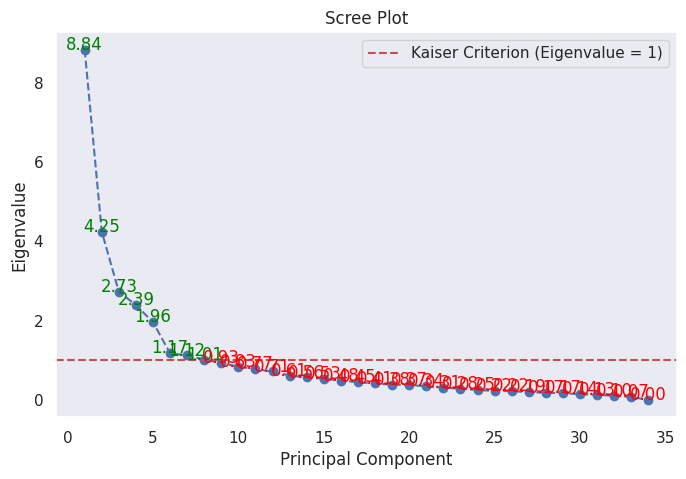

Number of components selected by the Kaiser criterion: 8


In [146]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Explained variance and eigenvalues
explained_variance = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid()

# Mark Kaiser criterion (eigenvalue > 1)
for i, eigenvalue in enumerate(eigenvalues):
    if eigenvalue > 1:
        plt.text(i + 1, eigenvalue, f'{eigenvalue:.2f}', color='green', ha='center')
    else:
        plt.text(i + 1, eigenvalue, f'{eigenvalue:.2f}', color='red', ha='center')

plt.axhline(y=1, color='r', linestyle='--', label='Kaiser Criterion (Eigenvalue = 1)')
plt.legend()
plt.show()

# Report the number of components selected by the Kaiser criterion
num_components_kaiser = sum(eigenvalues > 1)
print(f'Number of components selected by the Kaiser criterion: {num_components_kaiser}')


In [147]:

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_) * 100

# Find number of components that cover 70% to 90% variance
min_components_70 = np.argmax(cumulative_variance >= 70) + 1
max_components_90 = np.argmax(cumulative_variance >= 90) + 1

# Report results
print(f'Number of components for at least 70% variance: {min_components_70}, covering {cumulative_variance[min_components_70 - 1]:.2f}% variance')
print(f'Number of components for at least 90% variance: {max_components_90}, covering {cumulative_variance[max_components_90 - 1]:.2f}% variance')


Number of components for at least 70% variance: 8, covering 70.90% variance
Number of components for at least 90% variance: 19, covering 91.07% variance


# LDA algorithm

In [148]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [149]:
# Apply LDA
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, Y)


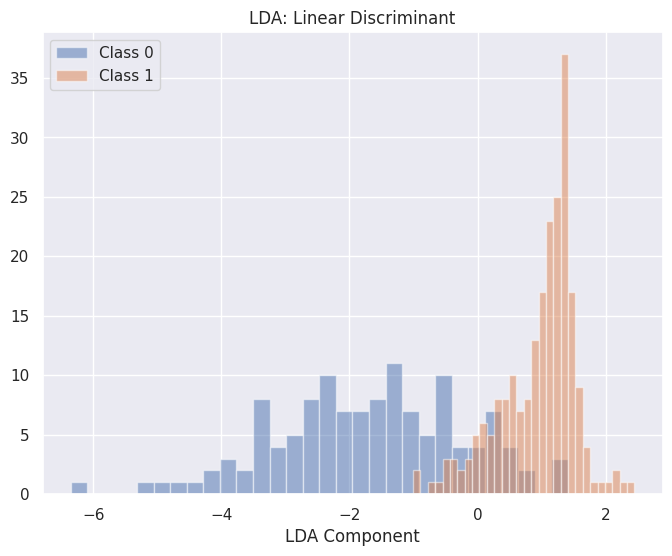

In [150]:
# Plot LDA results
plt.figure(figsize=(8, 6))
for label in np.unique(Y):
    plt.hist(X_lda[Y == label], bins=30, alpha=0.5, label=f'Class {label}')
plt.title('LDA: Linear Discriminant')
plt.xlabel('LDA Component')
plt.legend()
plt.show()

## k-means

In [140]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Silhouette Score for k=2: 0.6981789426497124
Silhouette Score for k=3: 0.6291062645796691
Silhouette Score for k=4: 0.6052182177816966
Silhouette Score for k=5: 0.5961746804376075
Silhouette Score for k=6: 0.5178389620045001


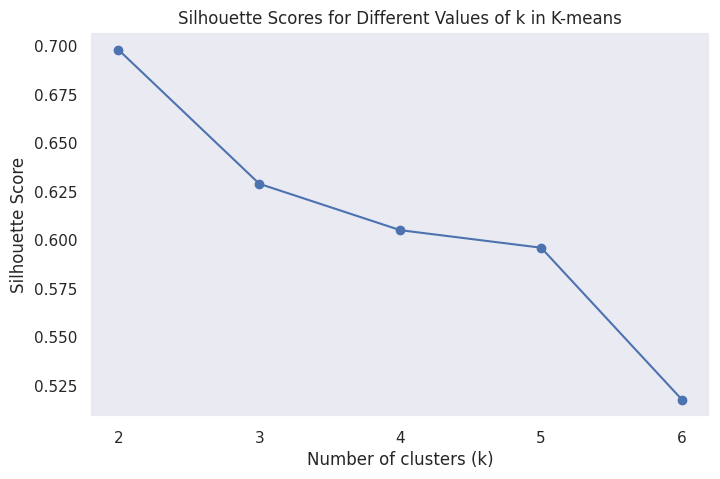

In [151]:
# List of k values to test
k_values = [2, 3, 4, 5, 6]
silhouette_scores = []

for k in k_values:
    # Apply K-means
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_lda)

    # Calculate Silhouette Score
    score = silhouette_score(X_lda, cluster_labels)
    silhouette_scores.append(score)
    print(f'Silhouette Score for k={k}: {score}')

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Values of k in K-means')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid()
plt.show()

Silhouette Score for k=2: 0.27004771082560575
Silhouette Score for k=3: 0.27539837163952685
Silhouette Score for k=4: 0.2726627238369061
Silhouette Score for k=5: 0.28736153727598984
Silhouette Score for k=6: 0.2922354915010285


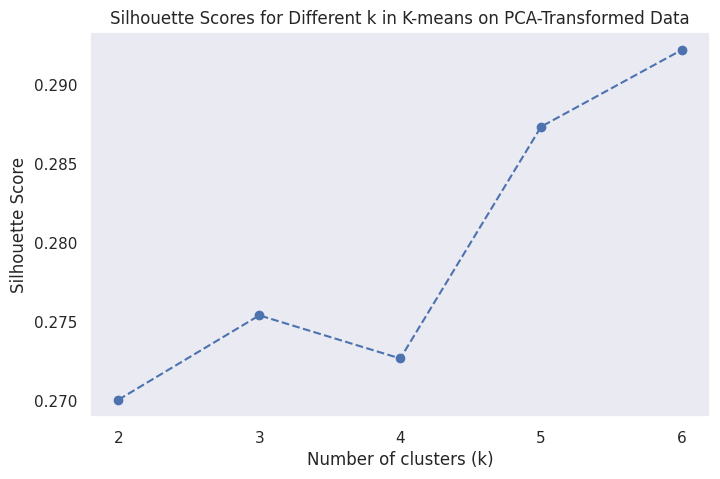

In [153]:
# List of k values to test
k_values = [2, 3, 4, 5, 6]
silhouette_scores_pca = []

for k in k_values:
    # Apply K-means on PCA-transformed data
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)

    # Calculate Silhouette Score
    score = silhouette_score(X_pca, cluster_labels)
    silhouette_scores_pca.append(score)
    print(f'Silhouette Score for k={k}: {score}')

# Plotting the Silhouette Scores for different k values
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores_pca, marker='o', linestyle='--')
plt.title('Silhouette Scores for Different k in K-means on PCA-Transformed Data')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid()
plt.show()

## dendrogram

In [154]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage

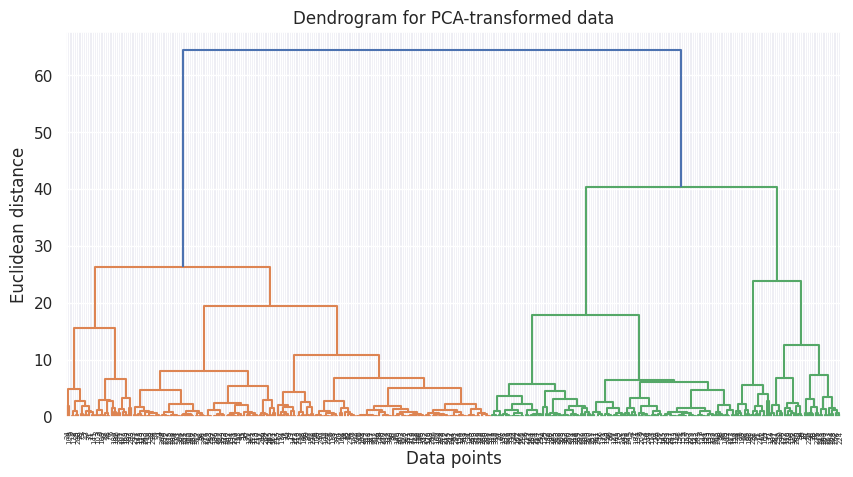

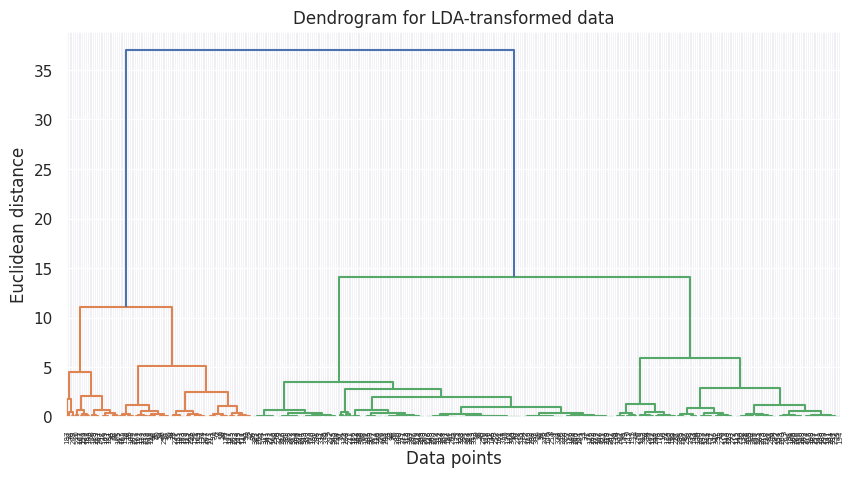

In [145]:
# Standardize the data
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply LDA
lda = LDA(n_components=1)  # Since we have 2 classes in Ionosphere dataset
X_lda = lda.fit_transform(X_scaled, Y)

# Plot dendrogram for PCA-transformed data
plt.figure(figsize=(10, 5))
plt.title('Dendrogram for PCA-transformed data')
dendrogram = sch.dendrogram(sch.linkage(X_pca, method='ward'))
plt.xlabel('Data points')
plt.ylabel('Euclidean distance')
plt.show()

# Plot dendrogram for LDA-transformed data
plt.figure(figsize=(10, 5))
plt.title('Dendrogram for LDA-transformed data')
dendrogram = sch.dendrogram(sch.linkage(X_lda, method='ward'))
plt.xlabel('Data points')
plt.ylabel('Euclidean distance')
plt.show()

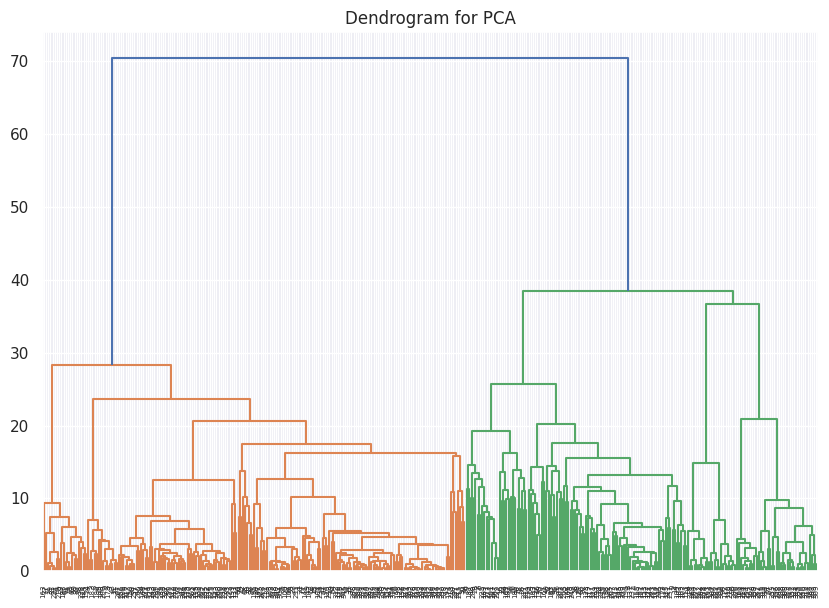

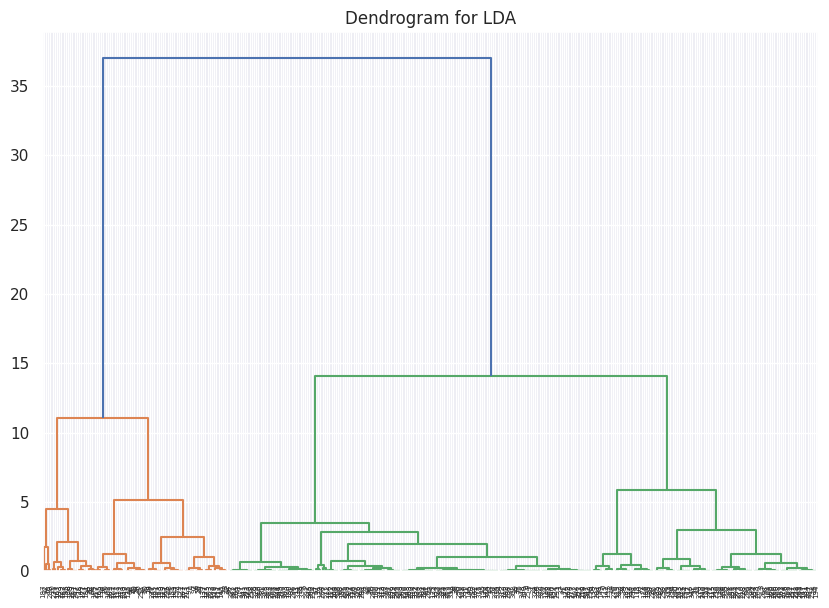

In [155]:
# Function to plot dendrogram
def plot_dendrogram(X, title):
    linked = linkage(X, 'ward')
    plt.figure(figsize=(10, 7))
    dendrogram(linked)
    plt.title(title)
    plt.show()

# Plot dendrograms for PCA and LDA transformed data
plot_dendrogram(X_pca, "Dendrogram for PCA")
plot_dendrogram(X_lda, "Dendrogram for LDA")

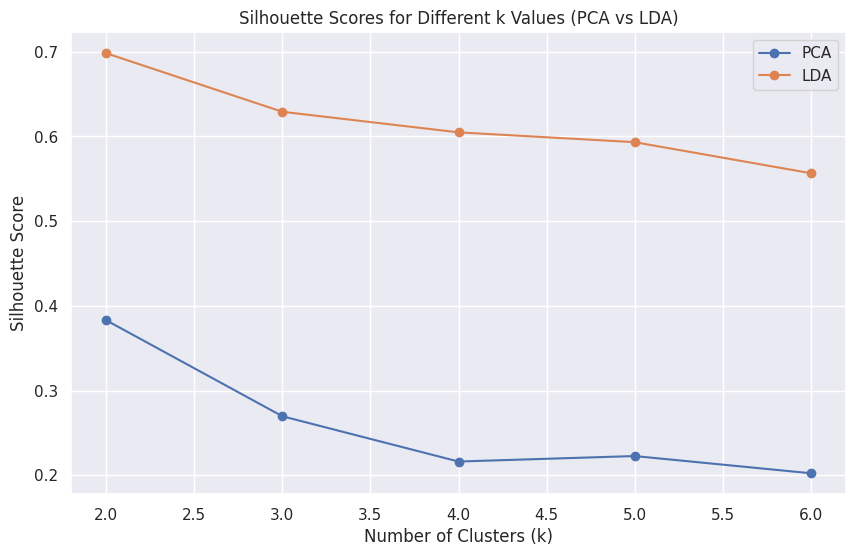

In [158]:

# Function to apply K-means and calculate silhouette scores
def kmeans_silhouette(X, k_values):
    silhouette_scores = {}
    for k in k_values:
        kmeans = KMeans(n_clusters=k)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)
        silhouette_scores[k] = score
    return silhouette_scores

# Evaluate K-means clustering with silhouette scores for both PCA and LDA
k_values = [2, 3, 4, 5, 6]
pca_silhouette_scores = kmeans_silhouette(X_pca, k_values)
lda_silhouette_scores = kmeans_silhouette(X_lda, k_values)

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, list(pca_silhouette_scores.values()), label="PCA", marker='o')
plt.plot(k_values, list(lda_silhouette_scores.values()), label="LDA", marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k Values (PCA vs LDA)')
plt.legend()
plt.show()